## 比特幣買賣點分析

In [2]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd')
#res.text

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
price = soup.select('#coin_portfolio_price_chart_btc')[0]['data-prices']

In [9]:
import pandas
df = pandas.DataFrame(eval(price) )

In [11]:
df.columns = ['datetime', 'price']

In [12]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


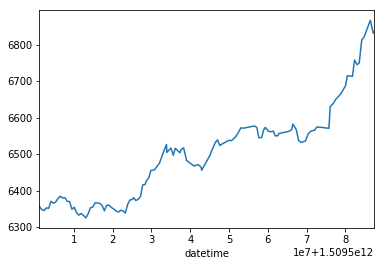

In [15]:
%pylab inline
df['price'].plot(kind='line')

In [16]:
df['mvg30'] = df['price'].rolling(window=30).mean()

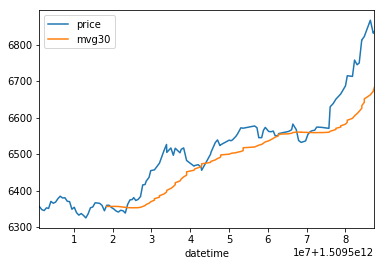

In [17]:
df[['price', 'mvg30']].plot(kind='line')

## 取得經緯度資訊

In [20]:
import requests
key = '<key>'
res = requests.get('https://maps.googleapis.com/maps/api/place/textsearch/json?query=臺北市大安區和平東路三段1巷72弄1~30號&key={}'.format(key))
#res.text

## 使用Plotly
- pip install plotly

In [22]:
! pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\Student\AppData\Local\pip\Cache\wheels\cc\87\3f\6a282eb21da5d8223472bed40ee023cdcf2e9691b117969a4c
Successfully built plotly


In [27]:
%pylab inline
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.plot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

Populating the interactive namespace from numpy and matplotlib


'file://C:\\Users\\Student\\temp-plot.html'

## 使用Google Trends 分析股票

In [28]:
import pandas
data = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/pyfintech/master/data/GoogleTrendsData.csv', index_col='Date',parse_dates=True)

In [31]:
data.tail()

,djia,debt
Date,,
2011-02-02,11891.93,0.190000
2011-02-09,12161.63,0.176667
2011-02-16,12268.19,0.173333
2011-02-24,12212.79,0.180000
2011-03-02,12226.34,0.170000


ERROR:root:Line magic function `%pylabinline` not found.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6F4518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9A7320>], dtype=object)

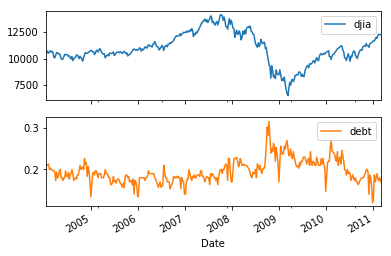

In [33]:
%pylabinline
data.plot(subplots=True)

In [40]:
data['debt_mavg']=data['debt'].rolling(window=3).mean()

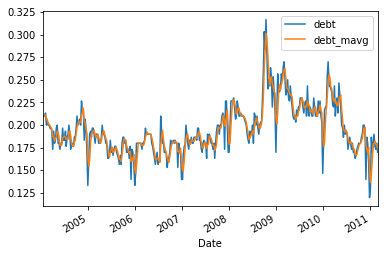

In [42]:
data[['debt', 'debt_mavg']].plot(kind = 'line')

In [44]:
data['debt_mavg'] = data.debt_mavg.shift(1)

In [45]:
data.head()

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,NaN
2004-02-04,10499.18,0.213333,0.210000
2004-02-11,10579.03,0.200000,0.211111


In [46]:
data['order']=0

In [48]:
data.head()

,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,0
2004-02-11,10579.03,0.200000,0.211111,0


In [49]:
data['order'][data.debt>data.debt_mavg]=-1
data['order'][data.debt<data.debt_mavg]=1
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,-1
2004-02-11,10579.03,0.200000,0.211111,1
2004-02-19,10714.88,0.203333,0.207778,1
2004-02-25,10609.62,0.200000,0.205555,1
2004-03-03,10678.14,0.200000,0.201111,1
2004-03-10,10529.48,0.196667,0.201111,1


In [50]:
data['ret_djia']=data.djia.pct_change()

In [51]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,NaN
2004-01-22,10528.66,0.210000,NaN,0,0.004147
2004-01-28,10702.51,0.210000,NaN,0,0.016512
2004-02-04,10499.18,0.213333,0.210000,-1,-0.018998
2004-02-11,10579.03,0.200000,0.211111,1,0.007605


In [52]:
data['ret_djia']=data['ret_djia'].shift(-1)

In [53]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147
2004-01-22,10528.66,0.210000,NaN,0,0.016512
2004-01-28,10702.51,0.210000,NaN,0,-0.018998
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841


In [54]:
data['ret_google']=data.order*data.ret_djia

In [55]:
data.head()

,djia,debt,debt_mavg,order,ret_djia,ret_google
Date,,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147,0.000000
2004-01-22,10528.66,0.210000,NaN,0,0.016512,0.000000
2004-01-28,10702.51,0.210000,NaN,0,-0.018998,-0.000000
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605,-0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841,0.012841


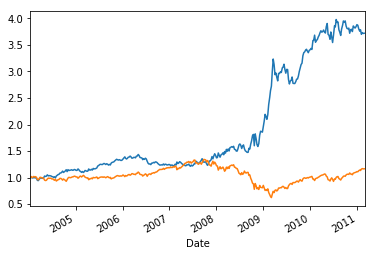

In [56]:
(1+data.ret_google).cumprod().plot();
(1+data.ret_djia).cumprod().plot();